In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import struct
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 


c:\Users\0Tene\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\0Tene\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\0Tene\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [2]:
class WavFileHelper():
    def read_file_properties(self, filename):
        
        wav_file = open(filename, 'rb')
        
        riff = wav_file.read(12)
        fmt = wav_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack ('<H', num_channels_string)[0]
        
        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack('<I', sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack('<H', bit_depth_string)[0]
        
        return (num_channels, sample_rate, bit_depth)

In [3]:
df = pd.read_csv('UrbanSound8K.csv',sep=',')

In [4]:
df.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [5]:
df1 = df[:200]

In [6]:
unique, counts = np.unique(df1['classID'],return_counts = True)

In [7]:
print (unique, counts)

[0 1 2 3 4 5 6 7 8 9] [58  5 16 31  4 33  1 22 24  6]


In [8]:
wavfilehelper = WavFileHelper()


audio_Data = []
for index, row in df1.iterrows():
    
    file_name = os.path.join(os.path.abspath('UrbanSound8K/audio/'),'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
    data = wavfilehelper.read_file_properties(file_name)
    audio_Data.append(data)
    
audio_DF = pd.DataFrame(audio_Data, columns=['num_channels','sample_rate','bit_depth'])

In [9]:
df1.loc[0,:]

slice_file_name    100032-3-0-0.wav
fsID                         100032
start                           0.0
end                        0.317551
salience                          1
fold                              5
classID                           3
class                      dog_bark
Name: 0, dtype: object

In [10]:
audio, sample_rate = librosa.load ('UrbanSound8K/audio/fold5/100032-3-0-0.wav', sr = None)

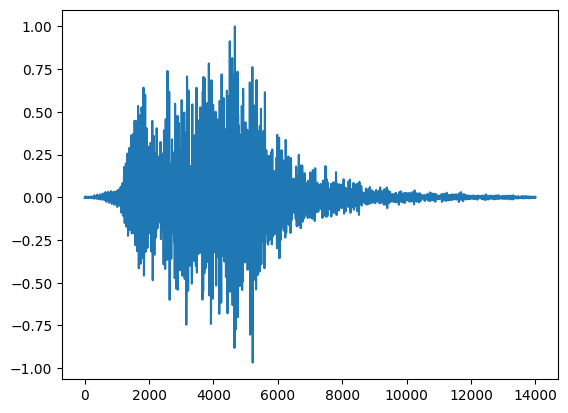

In [11]:
plt.plot(audio)
plt.show()

In [12]:
def extract_features (file_name):
    try:
        audio, sample_rate = librosa.load(file_name, sr= None)
        mfccs = librosa.feature.mfcc(y = audio, sr= sample_rate, n_mfcc=40)
        
       #mfccsscaled = np.mean(mfccs.T, axis = 0)
        mfccsscaled = mfccs
        
    except Exception as e:
        print('Error while parsing:', file)
        return None
    return mfccsscaled

In [13]:
features = []

fulldatasetpath = 'UrbanSound8K/audio/'

for index, row in df1.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
    
    class_label = row['classID']
    data = extract_features(file_name)
    
    features.append([data,class_label])
    
    features_DF = pd.DataFrame(features, columns = ['feature','class_label'])
    
        

In [14]:
print('Extraction from', len(features_DF), 'files')

Extraction from 200 files


In [15]:
X = []
for i in range(200):
    print (features_DF.loc[i,'feature'].shape)
    x = np.zeros((40,174))
    for j in range (40):
        for k, e in enumerate(features_DF.loc[i,'feature'][j][:174]):
         x[j,k] = e
    X.append(x)

(40, 28)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 56)
(40, 91)
(40, 35)
(40, 140)
(40, 161)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 376)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40, 345)
(40,

In [16]:
X = np.array(X)
X.shape
y = np.array(features_DF.class_label.tolist())

In [17]:
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [19]:
X.shape

(200, 40, 174)

In [20]:
x_train.shape

(160, 40, 174)

In [21]:


num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

In [22]:
#Model

In [23]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

c:\Users\0Tene\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

In [25]:
model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


In [26]:
model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

In [27]:
model.add(Dense(num_labels, activation='softmax'))

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 39, 173, 16)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 19, 86, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 19, 86, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 18, 85, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 42, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9, 42, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 41, 64)      │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 20, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 20, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 19, 128)     │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,602 (174.23 KB)

 Trainable params: 44,602 (174.23 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#Compile

In [30]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [31]:
# Calculate pre-training accuracy 

In [32]:
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]
print("Pre-training accuracy: %.4f%%" % accuracy) 

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.1750 - loss: 14.0079
Pre-training accuracy: 17.5000%


In [33]:
num_epochs = 10
num_batch_size = 20

checkpointer = ModelCheckpoint(filepath='weights.best.basic_cnn.keras', verbose=1, save_best_only=True)


model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_split=0.10, callbacks=[checkpointer], verbose=1)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1320 - loss: 24.7417
Epoch 1: val_loss improved from None to 4.07356, saving model to weights.best.basic_cnn.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.1944 - loss: 16.4899 - val_accuracy: 0.3125 - val_loss: 4.0736
Epoch 2/10
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3467 - loss: 4.8520
Epoch 2: val_loss improved from 4.07356 to 2.19147, saving model to weights.best.basic_cnn.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.3750 - loss: 4.1067 - val_accuracy: 0.3125 - val_loss: 2.1915
Epoch 3/10
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4692 - loss: 2.7879
Epoch 3: val_loss improved from 2.19147 to 2.13052, saving model to weights.best.basic_cnn.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.5000 - loss: 2.5130 - val_accuracy: 0.4375 - val_loss: 2.1305
Epoch 4/10
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5804 - loss: 1.7888
Epoch 4: val_loss improved from 2

In [34]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9125000238418579
Testing Accuracy:  0.8999999761581421
